# Breast Cancer - IA 2024

This project consists in the application of machine learning models and algorithms
related to supervised learning. 

- 0. Business Understanding 
    - 0.1. Business Goals
    - 0.2. Data Mining Problem Definition
    - 0.3. Data Mining Goals
- 1. Data Understanding
    - 1.1. About the Dataset
    - 1.2. Initial Data
    - 1.3. Explore Data
    - 1.4. Data Quality
- 2. Data Preparation
    - 2.1. Removing the Outliers
        - 2.1.1. Z-Score
        - 2.1.2. Interquartile Range (IQR)
    - 2.2. Cleaning the Dataset
    - 2.3. Correlation Matrix
    - 2.4. Backward Elimination
- 3. Modeling
    - 3.1. Unbalanced Data
    - 3.2. Building the Models
    - 3.3. Model Selection
        - 3.3.1. Decision Trees
            - 3.3.1.1. Parameter Tuning
        - 3.3.2. Neural Networks
            - 3.3.2.1. Parameter Tuning
        - 3.3.3. K-NN
            - 3.3.3.1. Parameter Tuning
- 4. Evaluation

## 0. Business Understanding

#### 0.1. Business Goals

We aim to improve healthcare outcomes using the breast cancer dataset. Our goal is to develop predictive models that reduce misdiagnosis rates, minimize unnecessary procedures, and enhance treatment outcomes for patients with breast masses.

#### 0.2. Data Mining Problem Definition

Our task is to create a model that accurately classifies breast masses as malignant or benign using features from digitized images. This model will help healthcare professionals make timely and accurate diagnoses, improving treatment planning and patient management.

#### 0.3. Data Mining Goals

Our goals include building an accurate predictive model and identifying key features that contribute to classification. We aim to enhance model interpretability and integration into clinical practice for better patient care.

To assess our algorithms' performance in classifying breast masses, we'll utilize key metrics: accuracy for overall correctness, precision for accurate identification of malignant cases, recall for capturing all actual malignant cases, and the F1 score for a balanced evaluation. Additionally, the confusion matrix will provide a detailed breakdown of classifications, offering insights into our model's performance.

## 1. Data Understanding

The Breast Cancer dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of cell nuclei present in the image.

### 1.1. About the Dataset

The dataset contains 569 registers 62.7% being of type B (Benign) and 37.3% being of type M (Malignant) and is composed of 32 attributes. 

These attributes are:
- **ID**: Unique identifier for each sample.
- **Diagnosis**: The diagnosis of the breast mass (Malignant - M, Benign - B).
- **Radius Mean**: Mean of distances from the center to points on the perimeter.
- **Texture Mean**: Standard deviation of gray-scale values.
- **Perimeter Mean**: Mean size of the core tumor.
- **Area Mean**: Mean area of the core tumor.
- **Smoothness Mean**: Mean smoothness of the cell nuclei.
- **Compactness Mean**: Mean compactness of the cell nuclei.
- **Concavity Mean**: Mean concavity of the cell nuclei.
- **Concave Points Mean**: Mean number of concave portions of the contour.
- **Symmetry Mean**: Mean symmetry of the cell nuclei.
- **Fractal Dimension Mean**: Mean "coastline approximation" - 1.
- **Radius SE**: Standard error for the mean of distances from the center to points on the perimeter.
- **Texture SE**: Standard error for the standard deviation of gray-scale values.
- **Perimeter SE**: Standard error for the mean size of the core tumor.
- **Area SE**: Standard error for the mean area of the core tumor.
- **Smoothness SE**: Standard error for the mean smoothness of the cell nuclei.
- **Compactness SE**: Standard error for the mean compactness of the cell nuclei.
- **Concavity SE**: Standard error for the mean concavity of the cell nuclei.
- **Concave Points SE**: Standard error for the mean number of concave portions of the contour.
- **Symmetry SE**: Standard error for the mean symmetry of the cell nuclei.
- **Fractal Dimension SE**: Standard error for the mean "coastline approximation" - 1.
- **Radius Worst**: Largest radius measured from the center to the perimeter of the tumor.
- **Texture Worst**: Highest variation in gray-scale values in the tumor.
- **Perimeter Worst**: Largest perimeter measurement of the tumor.
- **Area Worst**: Largest area measurement of the tumor.
- **Smoothness Worst**: Highest level of surface irregularity measured on the tumor cells.
- **Compactness Worst**: Greatest density of the tumor cells (closeness of the cells).
- **Concavity Worst**: Largest concavity observed in the tumor cell contours.
- **Concave Points Worst**: Maximum number of concave points detected on the tumor contour.
- **Symmetry Worst**: Least symmetry observed in the tumor cells.
- **Fractal Dimension Worst**: Highest complexity observed in the tumor cell borders.

Target Variable:
- **Diagnosis**: Malignant (M) or Benign (B).

### 1.2. Initial Data

In [33]:
import numpy as np
import pandas
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
import warnings

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from scipy.stats import zscore
from sklearn.exceptions import ConvergenceWarning
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, ConfusionMatrixDisplay)
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                     GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [34]:
df = pandas.read_csv("../data/data.csv")

df.drop(['id'], axis=1, inplace=True) # Drop the 'id' column as it is not needed for analysis

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.3. Explore Data

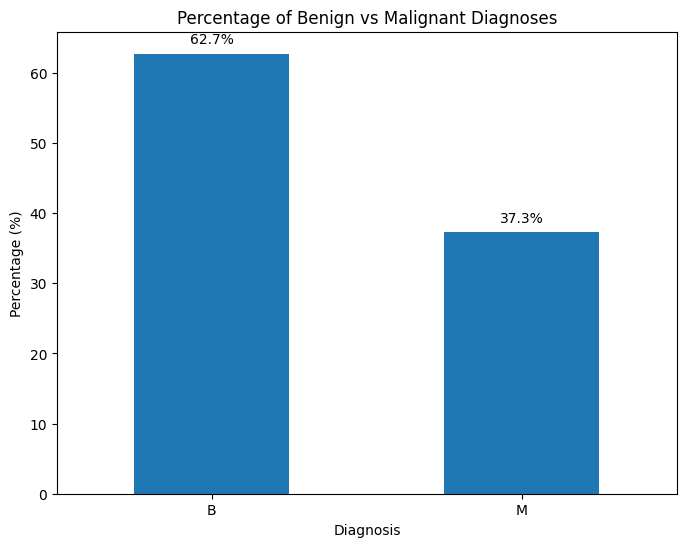

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
diagnosis_counts = df['diagnosis'].value_counts(normalize=True) * 100  # Convert to percentages

plt.figure(figsize=(8, 6))
ax = diagnosis_counts.plot(kind='bar') # Create a bar plot for percentages
plt.title('Percentage of Benign vs Malignant Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) 

# Show the percentages on the bars for better understanding
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

df.describe() # Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution

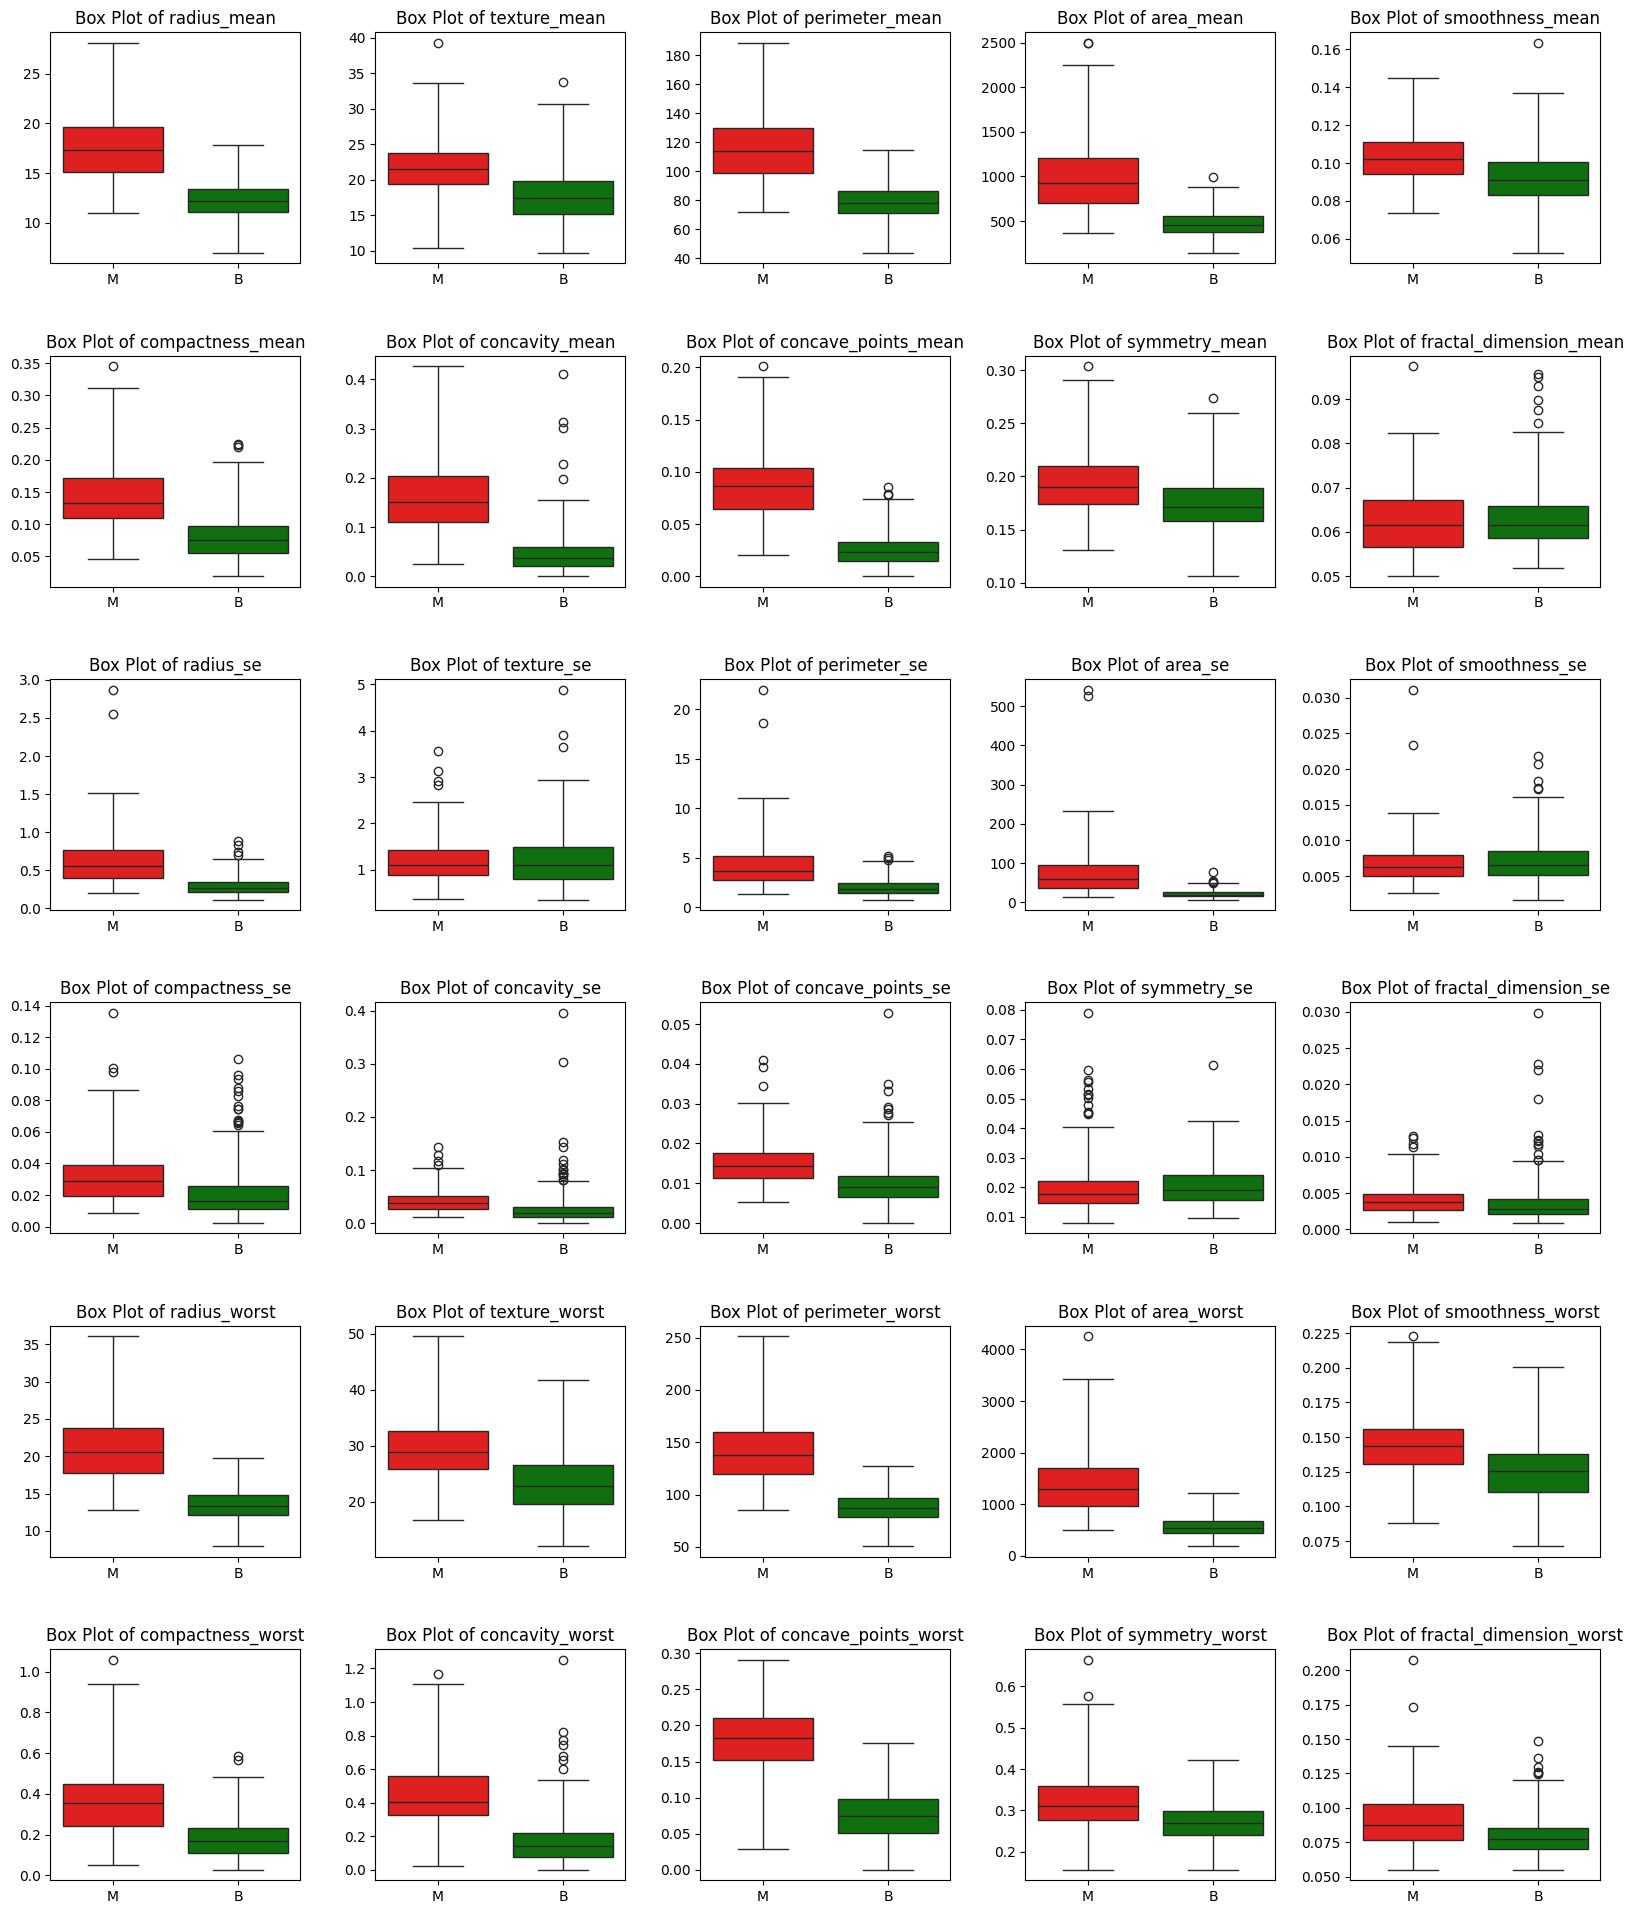

In [36]:
def box_plot():

    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    n_cols = 5  # Number of columns for subplots
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Create subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the space between subplots

    custom_palette = {'B': 'green', 'M': 'red'}  # B for benign, M for malignant

    # Plot each boxplot on a subplot
    for index, column in enumerate(numeric_columns):
        row = index // n_cols
        col = index % n_cols

        # Adjust the whis parameter to extend the whiskers
        sb.boxplot(x='diagnosis', y=column, hue='diagnosis', data=df, ax=axs[row, col], palette=custom_palette, whis=2.5, legend=False)  
        axs[row, col].set_title(f'Box Plot of {column}')
        axs[row, col].set_xlabel('')
        axs[row, col].set_ylabel('')

    if len(numeric_columns) % n_cols != 0:  # Hide the last subplot if it is not used
        for ax in axs.flat[len(numeric_columns):]:
            ax.set_visible(False)

    plt.show()

box_plot()

def hist():
    df.hist(figsize=(20, 20), color='blue',
        edgecolor='black', alpha=0.4, bins=10, grid=False)

The box plot visualizes the distribution of data, highlighting the median, interquartile range (IQR), and overall variability within each class.

By extending the whiskers to 2.5 times the IQR, we capture a broader data range, reducing the number of points considered outliers. These whiskers indicate the minimum and maximum values within this adjusted range, while outliers — values that are unusually high or low relative to the rest of the data — are displayed as individual points outside the whiskers. These points will be addressed later in the analysis.

Additionally, the analysis suggests potential correlations among some values. Confirming these correlations could lead to the removal of redundant variables. We plan to explore and address these correlations in subsequent phases of our analysis.

This approach helps us better understand the dataset's spread and central tendencies, important for diagnosing and planning patient treatment. 

### 1.4. Data Quality

Poor data quality negatively affects many data processing efforts. As we have observed in our dataset, it contains outliers and noise — extraneous objects or modifications to original values — that disrupt the analysis. We will also investigate the presence of missing values and duplicated data. Addressing these issues is essential for ensuring the integrity and accuracy of our findings.

In [37]:
null = df.isnull().sum().sum()  # Check for null values
nan = df.isna().sum().sum()  # Check for NaN values
duplicate = df.duplicated().sum()  # Check for duplicate rows

number = null + nan + duplicate  # Calculate the total number for data issues

print(f"Number of Null + NaN + Duplicates: {number}")

Number of Null + NaN + Duplicates: 0


## 2. Data Preparation

While our dataset is free of missing or duplicated entries, it does contain outliers.

### 2.1. Removing the Outliers

To address these issues, we are implementing two statistical methods: the Z-Score and the Interquartile Range (IQR). These techniques will be compared to ensure the most effective identification and removal of outliers, enhancing the accuracy of our analyses.

Let's begin by utilizing a scatter plot, which we find more intuitive to interpret compared to box plots due to its comprehensive display of all attributes. 

This will allow us to observe the raw data presentation without any alterations made to the dataset.

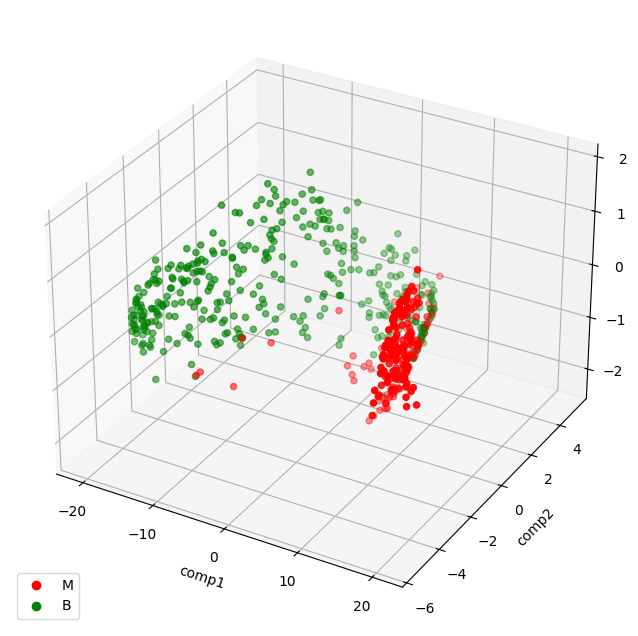

In [38]:
X = df.drop(['diagnosis'], axis=1)

diagnosis_map = {'M': -1, 'B': 1}
df['diagnosis_mapped'] = df['diagnosis'].map(diagnosis_map)

# Perform t-SNE
tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(X)
tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])
tsne_df['diagnosis'] = df['diagnosis_mapped']

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=tsne_df['diagnosis'],
                    cmap=ListedColormap(['red', 'green']))

# Labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
legend = plt.legend(*scatter.legend_elements(), loc='lower left')
legend.get_texts()[0].set_text('M')
legend.get_texts()[1].set_text('B')

plt.show()

Previously, we noted that certain data points, for the above plot, for example some red dots, deviate significantly from the expected distribution. 

Now, we'll revisit the plot, this time considering outliers and the methodologies employed to detect them.

#### 2.1.1. Z-Score

The Z-score quantifies how many standard deviations a data point is from the mean of the dataset. A Z-score of 0 signifies that the data point is at the mean. Positive or negative values indicate the number of standard deviations the data point is above or below the mean, respectively. This measurement is crucial for identifying outliers, which we define as observations that lie beyond 3 standard deviations from the mean.

We'll start by appling the method and identifying the outliers in a new column named "outliers_zscore". Outliers will be marked as True and Inliers will be marked as False

In [39]:
df.drop(['diagnosis_mapped'], axis=1, inplace=True)  # Drop the diagnosis_mapped column

# Drop the target variable for unsupervised learning
X = df.drop(['diagnosis'], axis=1)

X_scaled = X.apply(zscore)

# Detect outliers based on a threshold (e.g., 3 standard deviations)
outliers = (np.abs(X_scaled) > 3).any(axis=1)

pandas.set_option('future.no_silent_downcasting', True)
df['outliers_zscore'] = outliers.astype(int).replace({1: True, 0: False}) # Add a column to indicate outliers based on z-score method 

# check if the column was added
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,outliers_zscore
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,False
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,False
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,False
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,False
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,True


Next, we'll compare the base scatter plot with the values flagged as outliers using the Z-Score method.

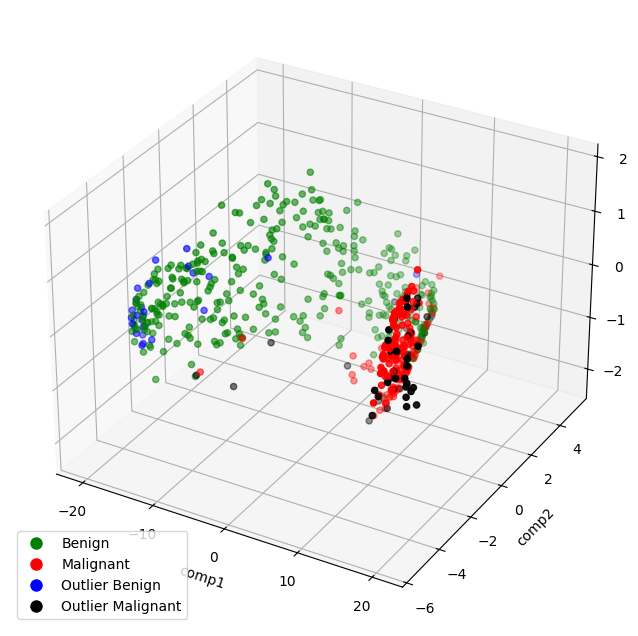

In [40]:

def zscore_scatter():
       colors = {
       ('B', False): 'green',  # Non-outlier Benign
       ('M', False): 'red',    # Non-outlier Malignant
       ('B', True): 'blue',    # Outlier Benign
       ('M', True): 'black'    # Outlier Malignant
       }

       # Apply the color map to each row in the dataframe
       outlier_colors = df.apply(lambda row: colors[(row['diagnosis'], row['outliers_zscore'])], axis=1)

       # Run t-SNE if not already done
       tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(df.drop(['diagnosis', 'outliers_zscore'], axis=1))
       tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])

       # Create the scatter plot
       fig = plt.figure(figsize=(8, 8))
       ax = fig.add_subplot(111, projection='3d')
       scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=outlier_colors)

       # Custom legend
       legend_elements = [
       Line2D([0], [0], marker='o', color='w', label='Benign',
              markerfacecolor='green', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Malignant',
              markerfacecolor='red', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Benign',
              markerfacecolor='blue', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Malignant',
              markerfacecolor='black', markersize=10)
       ]
       ax.legend(handles=legend_elements, loc='lower left')

       # Axis labels
       ax.set_xlabel('comp1')
       ax.set_ylabel('comp2')
       ax.set_zlabel('comp3')

       plt.show()

zscore_scatter()

Upon comparison, some of the previously suspected dots have indeed been confirmed as outliers. However, there are discrepancies: certain dots we anticipated as outliers remain unflagged, while unexpectedly, others are now identified as outliers. 

To further validate these findings, we'll explore another outlier detection method.

#### 2.1.2. Interquartile Range (IQR)

The Interquartile Range (IQR) measures the statistical dispersion of the data by evaluating the range between the first quartile (25th percentile) and the third quartile (75th percentile). It identifies the middle 50% of the dataset. To detect outliers, we utilize the IQR in conjunction with a multiplier, typically set at 1.5 times the IQR. Observations falling below the first quartile minus the multiplier times the IQR or above the third quartile plus the multiplier times the IQR are deemed outliers.

As before, we'll start by appling the method and identifying the outliers in a new column named "outliers_iqr". Outliers will be marked as True and Inliers will be marked as False


In [41]:
# Drop the target variable for unsupervised learning
X = df.drop(['diagnosis'], axis=1)

# Calculate the IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

# Add a column to indicate outliers based on IQR method
df['outliers_iqr'] = outliers.astype(int).replace({1: True, 0: False})

# Check if the column was added
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,outliers_zscore,outliers_iqr
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True,True
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False,True
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False,True
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True,True
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False,True
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,False,True
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,False,False
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,False,False
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,False,True
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,True,True


Next, we'll compare the base scatter plot with the values flagged as outliers using the IQR method.

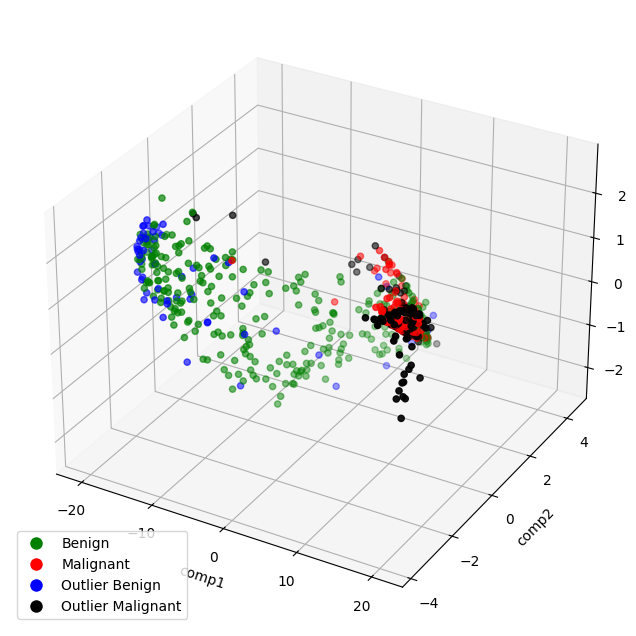

In [42]:

def irq_scatter():
       colors = {
       ('B', False): 'green',  # Non-outlier Benign
       ('M', False): 'red',    # Non-outlier Malignant
       ('B', True): 'blue',    # Outlier Benign
       ('M', True): 'black'    # Outlier Malignant
       }

       # Apply the color map to each row in the dataframe
       outlier_colors = df.apply(lambda row: colors[(row['diagnosis'], row['outliers_iqr'])], axis=1)

       # Run t-SNE if not already done
       tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(df.drop(['diagnosis', 'outliers_iqr'], axis=1))
       tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])

       # Create the scatter plot
       fig = plt.figure(figsize=(8, 8))
       ax = fig.add_subplot(111, projection='3d')
       scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=outlier_colors)

       # Custom legend
       legend_elements = [
       Line2D([0], [0], marker='o', color='w', label='Benign',
              markerfacecolor='green', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Malignant',
              markerfacecolor='red', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Benign',
              markerfacecolor='blue', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Malignant',
              markerfacecolor='black', markersize=10)
       ]
       ax.legend(handles=legend_elements, loc='lower left')

       # Axis labels
       ax.set_xlabel('comp1')
       ax.set_ylabel('comp2')
       ax.set_zlabel('comp3')

       plt.show()

irq_scatter()

It's evident that the IQR method flagged significantly more points as outliers. However, to ensure the accuracy of our outlier identification, we need to determine which points are truly outliers. 

To achieve this, we'll investigate where both methods agree and what implications this agreement has for the dataset as a whole.

In [43]:
# Calculate the number of outliers detected by each method

outliers_iqr_count = df['outliers_iqr'].sum()
outliers_zscore_count = df['outliers_zscore'].sum()
agreed_outliers_count = ((df['outliers_iqr'] == True) & (df['outliers_zscore'] == True)).sum()

# Calculate the percentage of True values for each method
total_samples = len(df)
percentage_outliers_iqr = (outliers_iqr_count / total_samples) * 100
percentage_outliers_zscore = (outliers_zscore_count / total_samples) * 100
percentage_agreed_outliers = (agreed_outliers_count / total_samples) * 100

# Print the results
print("Number of outliers detected by IQR method:", outliers_iqr_count)
print("Number of outliers detected by Z-Score method:", outliers_zscore_count)
print("Percentage of outliers detected by IQR method:", percentage_outliers_iqr, "%")
print("Percentage of outliers detected by Z-Score method:", percentage_outliers_zscore, "%")
print("Number of outliers detected by both methods (agreed outliers):", agreed_outliers_count)
print("Percentage of outliers detected by both methods (agreed outliers):", percentage_agreed_outliers, "%")

df.head(10)


Number of outliers detected by IQR method: 171
Number of outliers detected by Z-Score method: 74
Percentage of outliers detected by IQR method: 30.052724077328648 %
Percentage of outliers detected by Z-Score method: 13.005272407732866 %
Number of outliers detected by both methods (agreed outliers): 74
Percentage of outliers detected by both methods (agreed outliers): 13.005272407732866 %


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,outliers_zscore,outliers_iqr
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True,True
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False,True
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False,True
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True,True
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False,True
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,False,True
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,False,False
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,False,False
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,False,True
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,True,True


### 2.2. Cleaning the Dataset

Considering the size of our dataset, removing 13% of it would significantly impact our study of the models. Therefore, we've opted to replace the outlier values in the dataset with their respective median values. This approach ensures that our analysis remains robust while mitigating the influence of outliers on our results.

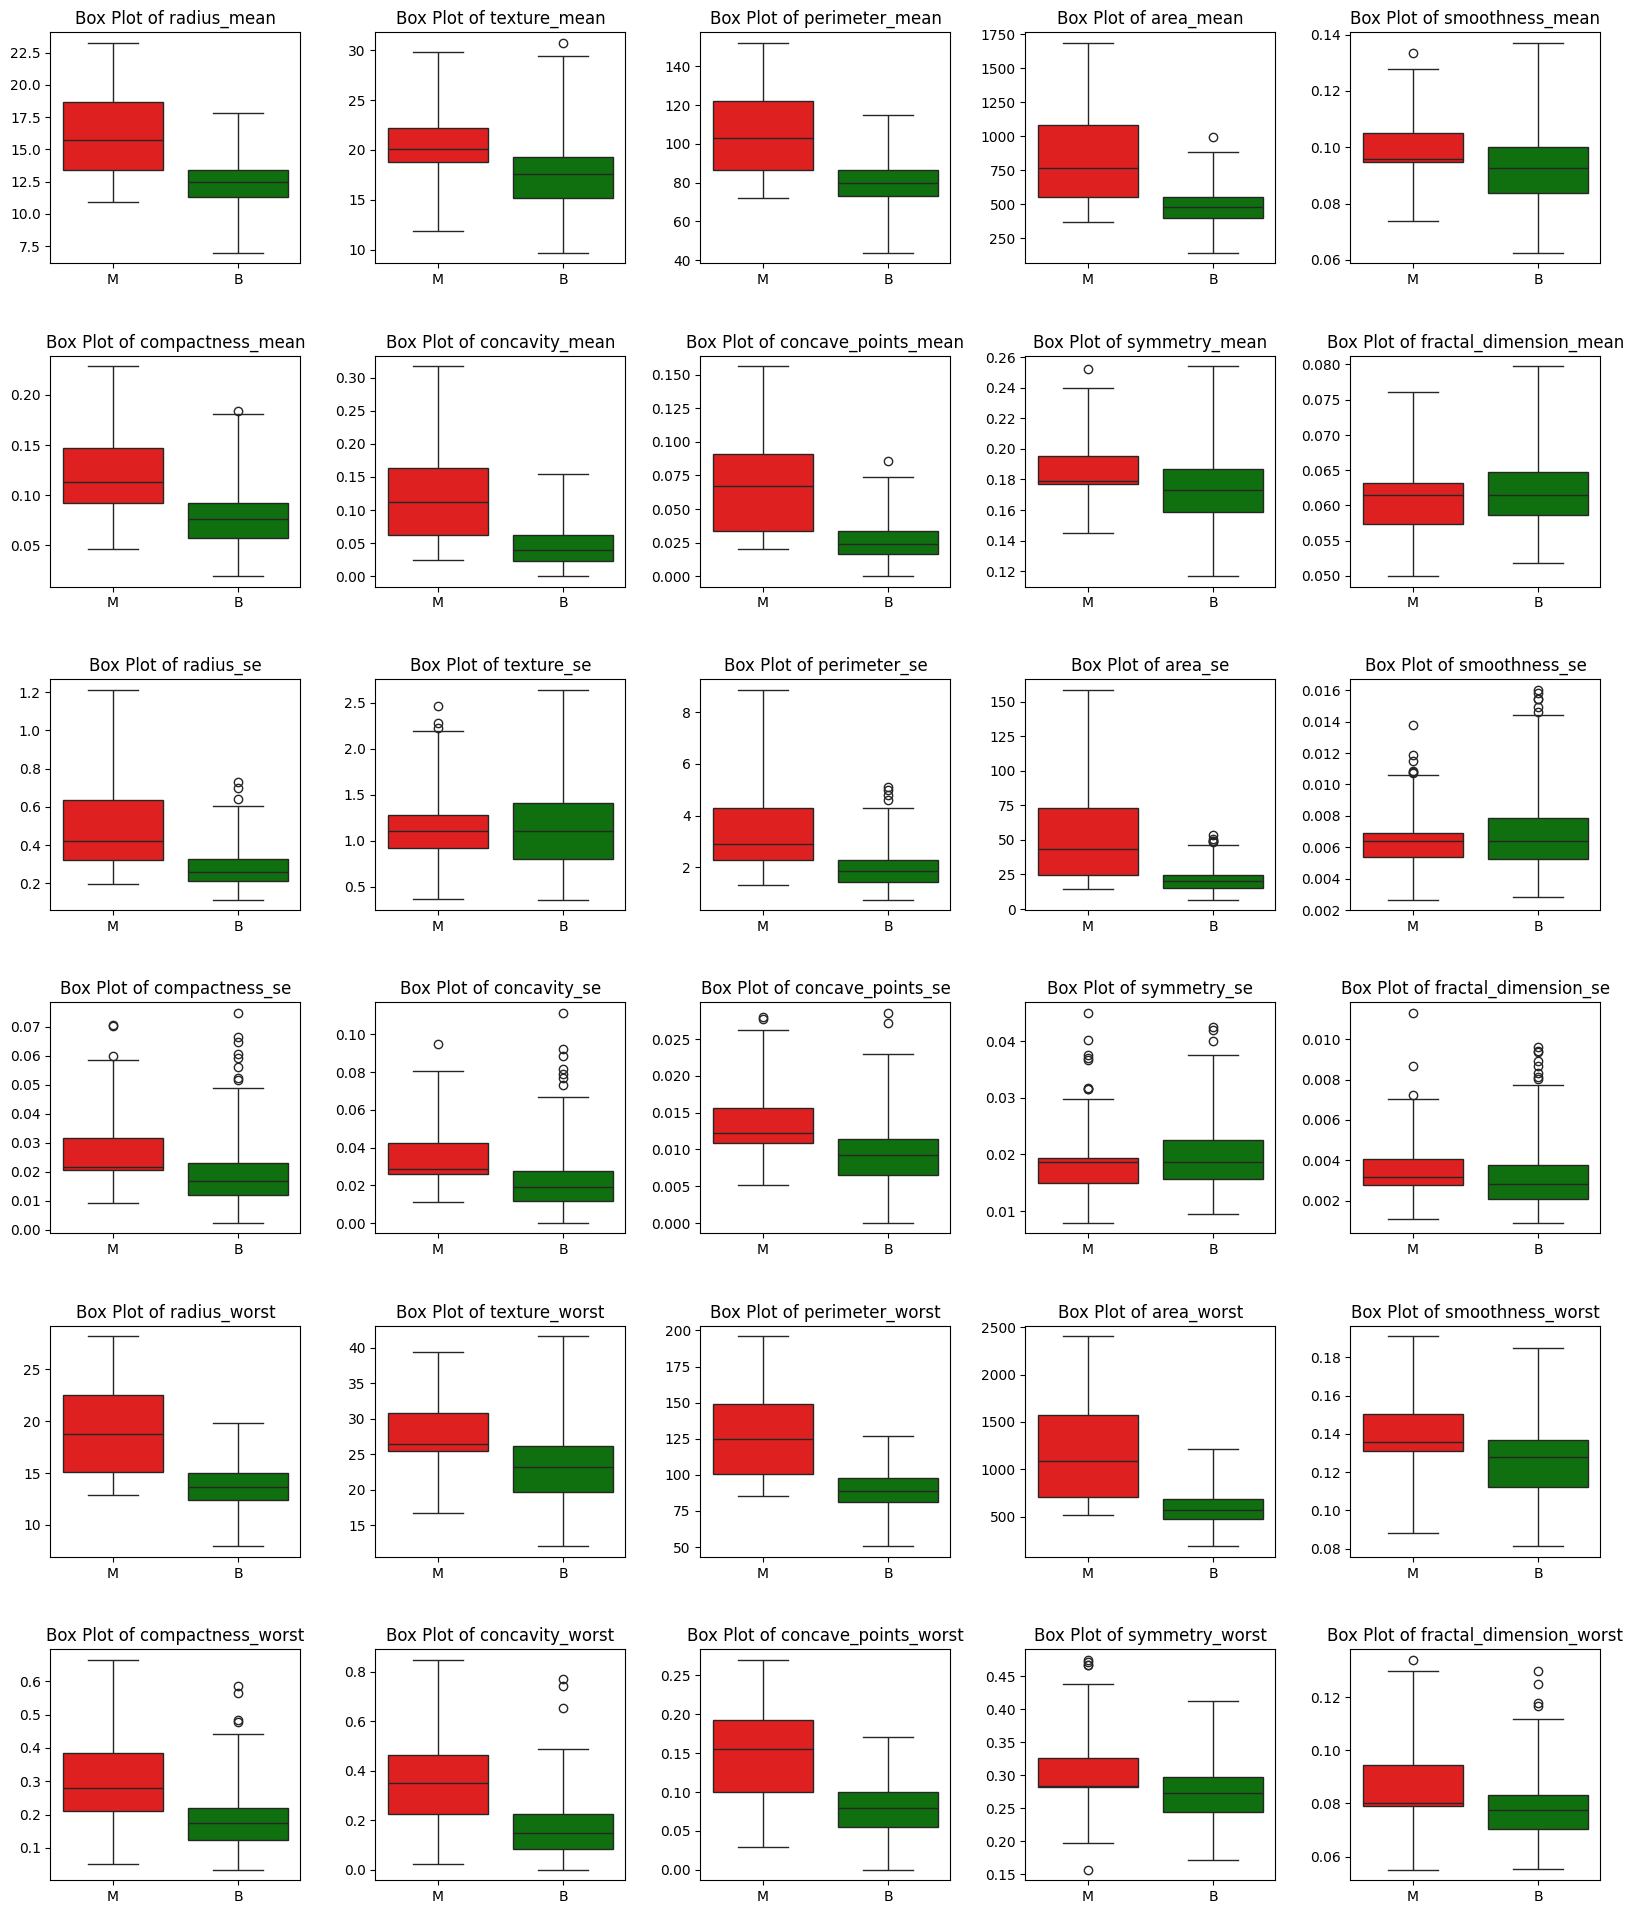

In [44]:
# Get the indices of agreed outliers
agreed_outliers_indices = df[(df['outliers_iqr'] == True) & (df['outliers_zscore'] == True)].index

# Replace outlier values with their respective median values
for column in X.columns:
    median_value = X[column].median()
    df.loc[agreed_outliers_indices, column] = median_value

df.drop(['outliers_iqr', 'outliers_zscore'], axis=1, inplace=True)  # Drop the outlier columns

# Check the first few rows of the modified dataset
df.head()

box_plot()


While the box plots show some improvement with fewer outliers, there are still some unusual values present. We'll need to study this deeper to ensure our approach is appropriate. 

It's also possible that these outliers represent rare but legitimate clinical cases.

For now, let's consider out data "free" of outliers and save it as clean dataset.

In [45]:
df.to_csv('../data/data_clean.csv', index=False)

Let's proceed by analyzing and comparing the cleaned dataset with the original dataset through the use of histograms. This will allow us to visually assess differences and identify any significant changes or patterns resulting from the data cleaning process.

First let's check the old dataset:

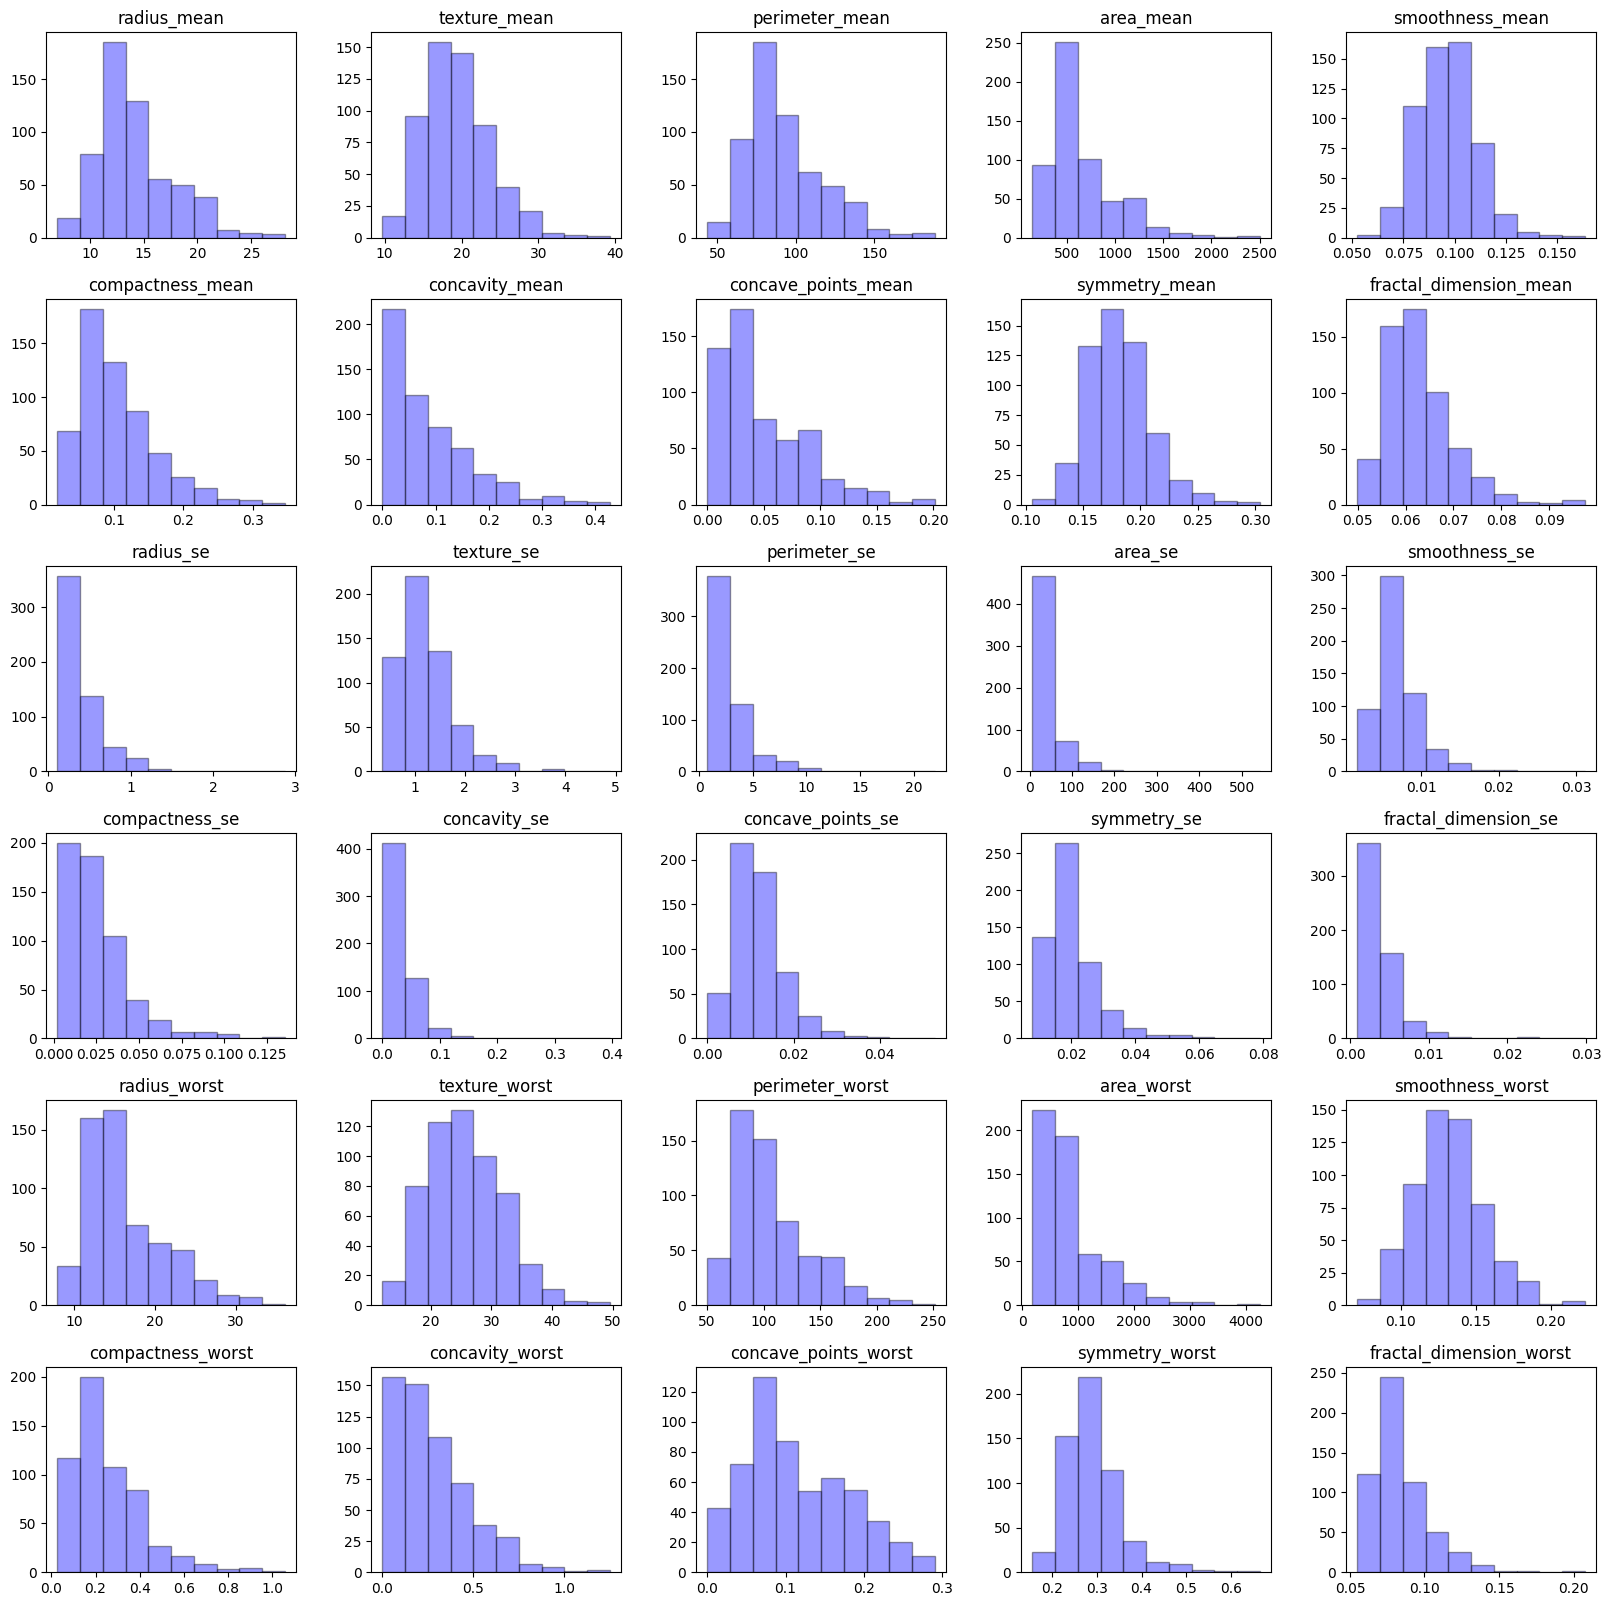

In [46]:
# DATA BEFORE ANYTHING
Y = pandas.read_csv("../data/data.csv")

Y.drop(['id'], axis=1, inplace=True) # Drop the 'id' column as it is not needed for analysis

Y.hist(figsize=(20, 20), color='blue',
        edgecolor='black', alpha=0.4, bins=10, grid=False);

Now the new dataset:

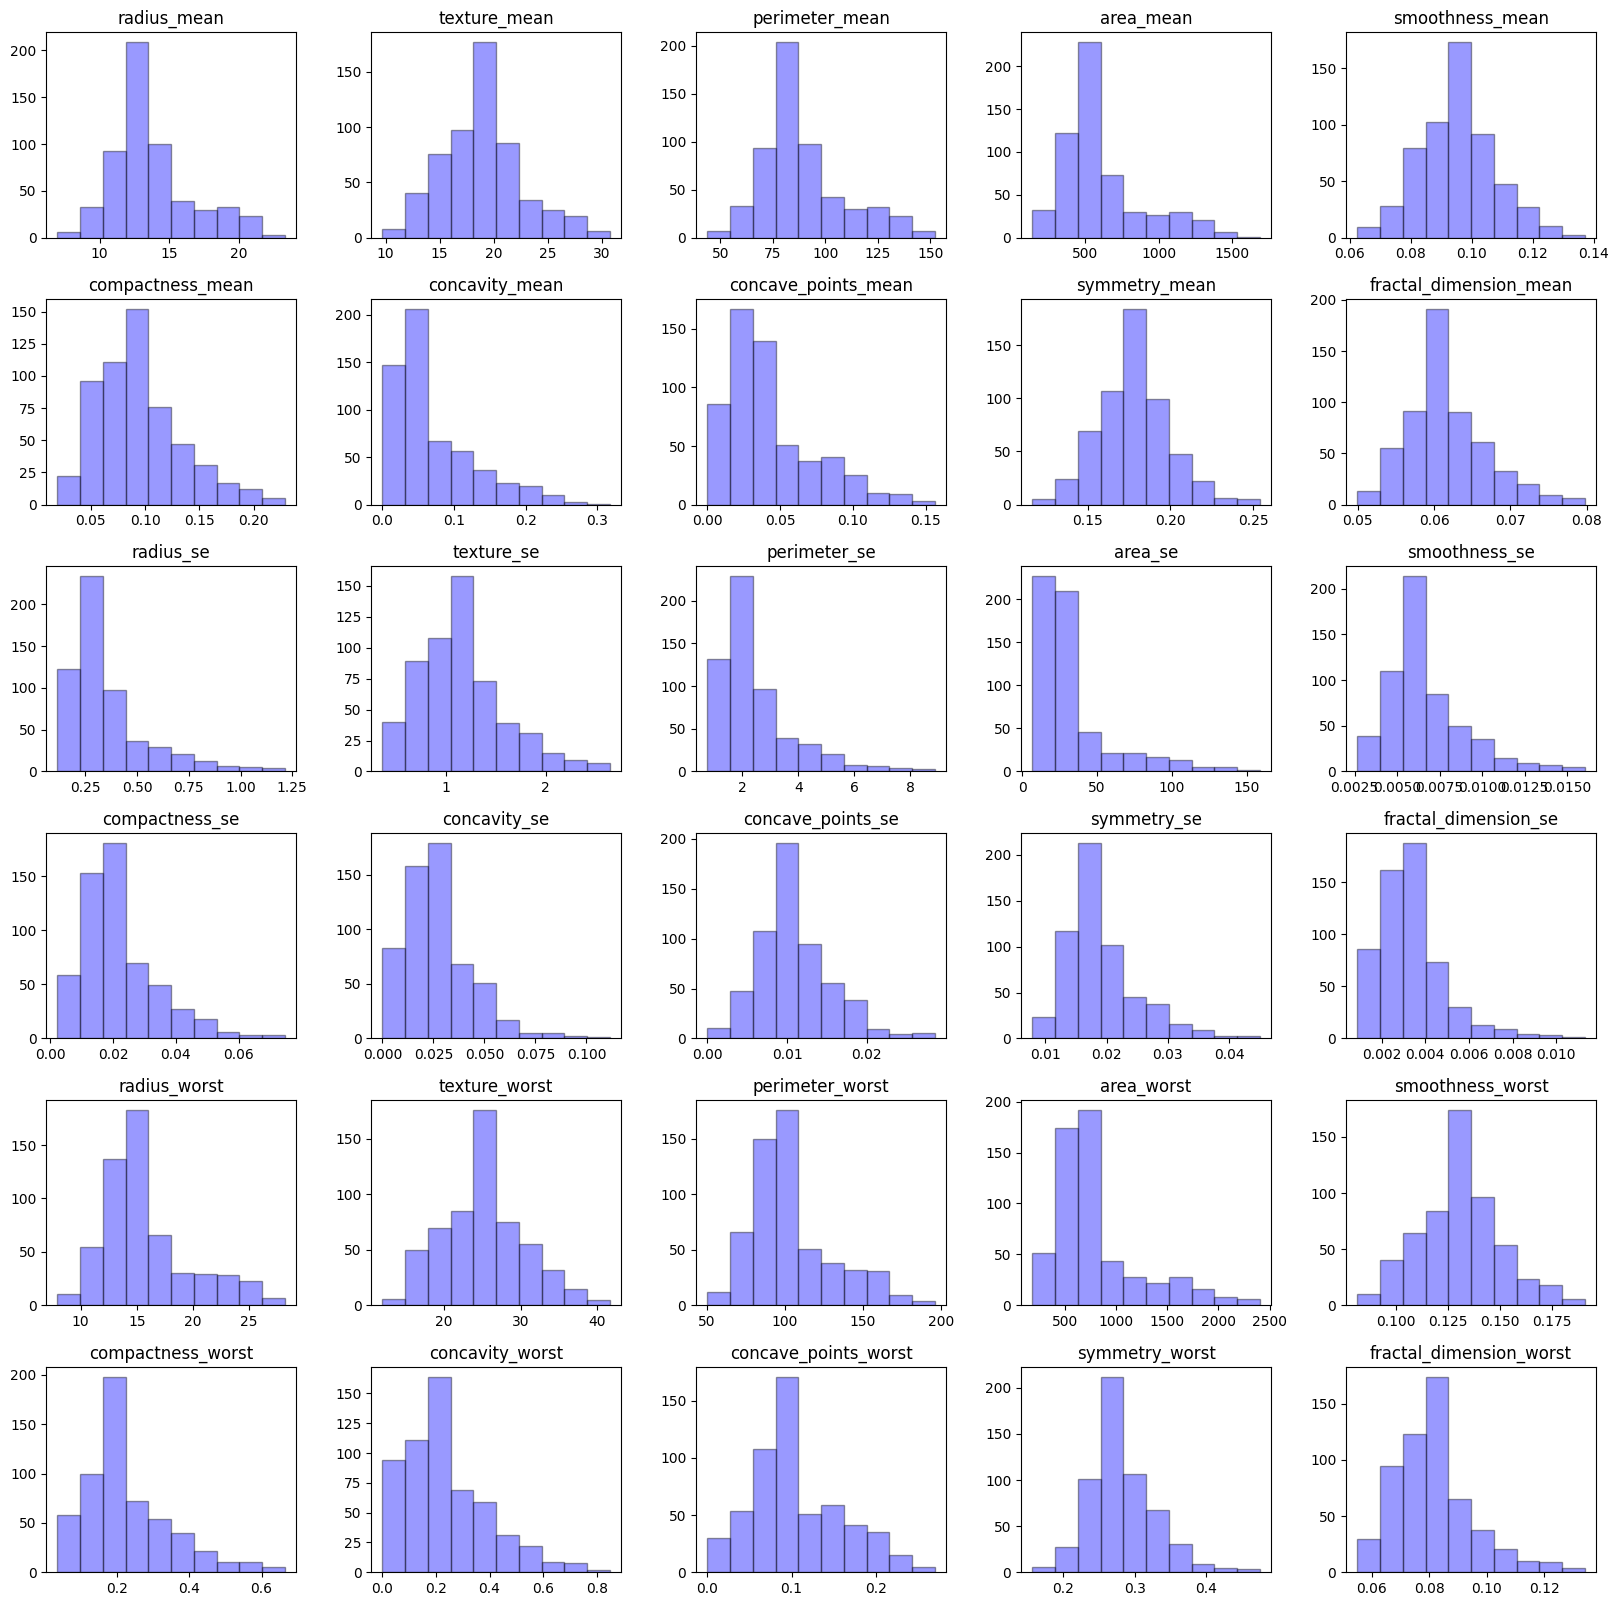

In [47]:
# DATA AFTER CLEANING
X = pandas.read_csv("../data/data_clean.csv", index_col=None)

X.hist(figsize=(20, 20), color='blue',
        edgecolor='black', alpha=0.4, bins=10, grid=False);

Upon removing outliers based on the median, the cleaned dataset exhibits histograms with tightened distributions, reflecting reduced variability and skewness in key features. 

The central tendency of the data is now more pronounced, suggesting that median values are more representative of the whole. 

Notably, the reduction in extreme values across features like radius_worst, texture_worst, and area_worst points to a more robust dataset, potentially leading to more reliable statistical analyses. 

Care has been taken to ensure valuable information is not lost in the process of outlier mitigation, maintaining the integrity of significant data points within the medical context of the study.

### 2.3. Correlation Matrix

A correlation matrix is an essential tool in statistical analysis that measures the strength and direction of the linear relationship between pairs of variables. Each cell in the matrix displays the correlation coefficient between two variables. This coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases proportionally.
- -1 indicates a perfect negative correlation, meaning that as one variable increases, the other decreases proportionally.
- 0 signifies no correlation, implying that the two variables do not have any linear relationship.

In the correlation matrix, variables are listed on both the rows and columns, with the main diagonal typically representing the correlation of each variable with itself, always equal to 1. Visualizing this matrix through a heatmap can quickly help identify areas where variables are strongly correlated, which can be crucial for tasks such as feature selection and predictive modeling. Filtering this matrix to display only strong correlations (for example, greater than 0.5 or less than -0.5) allows researchers to focus on more significant and potentially informative relationships.

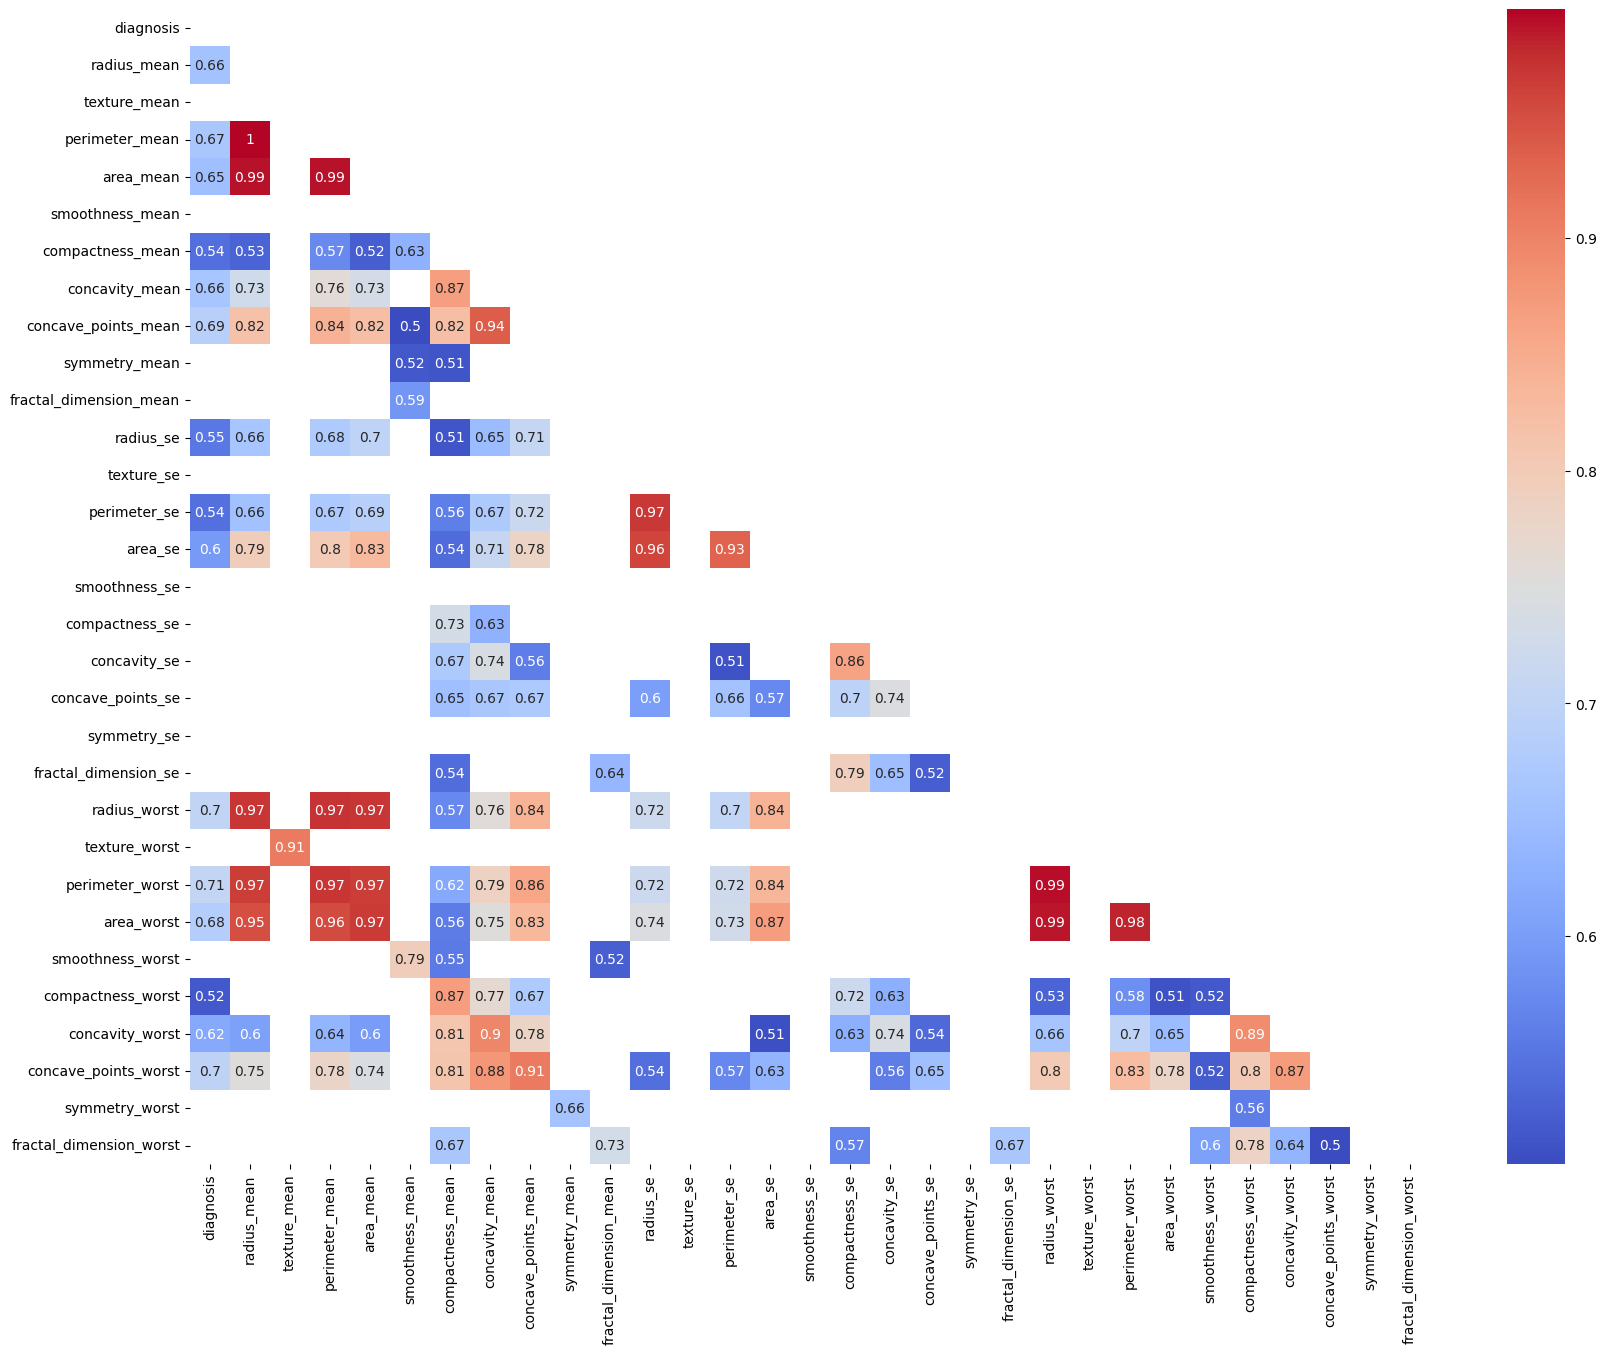

In [48]:
# calculate the correlation between each pair of columns
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
corr_matrix = df.corr()

# Select only the columns with a correlation greater than 0.5 or less than -0.5
corr_matrix = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 15))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, mask=mask)
plt.show()

df['diagnosis'] = df['diagnosis'].map({0: 'B', 1: 'M'})  # Swapping Back

Several features show a high degree of positive correlation, particularly those related to size (like radius, perimeter, and area), suggesting these may be interdependent. Conversely, the fractal dimension shows weaker correlations with other features, which could imply it provides distinct information.

Now, let´s check, in more detail, how these features relate with diagnosis.

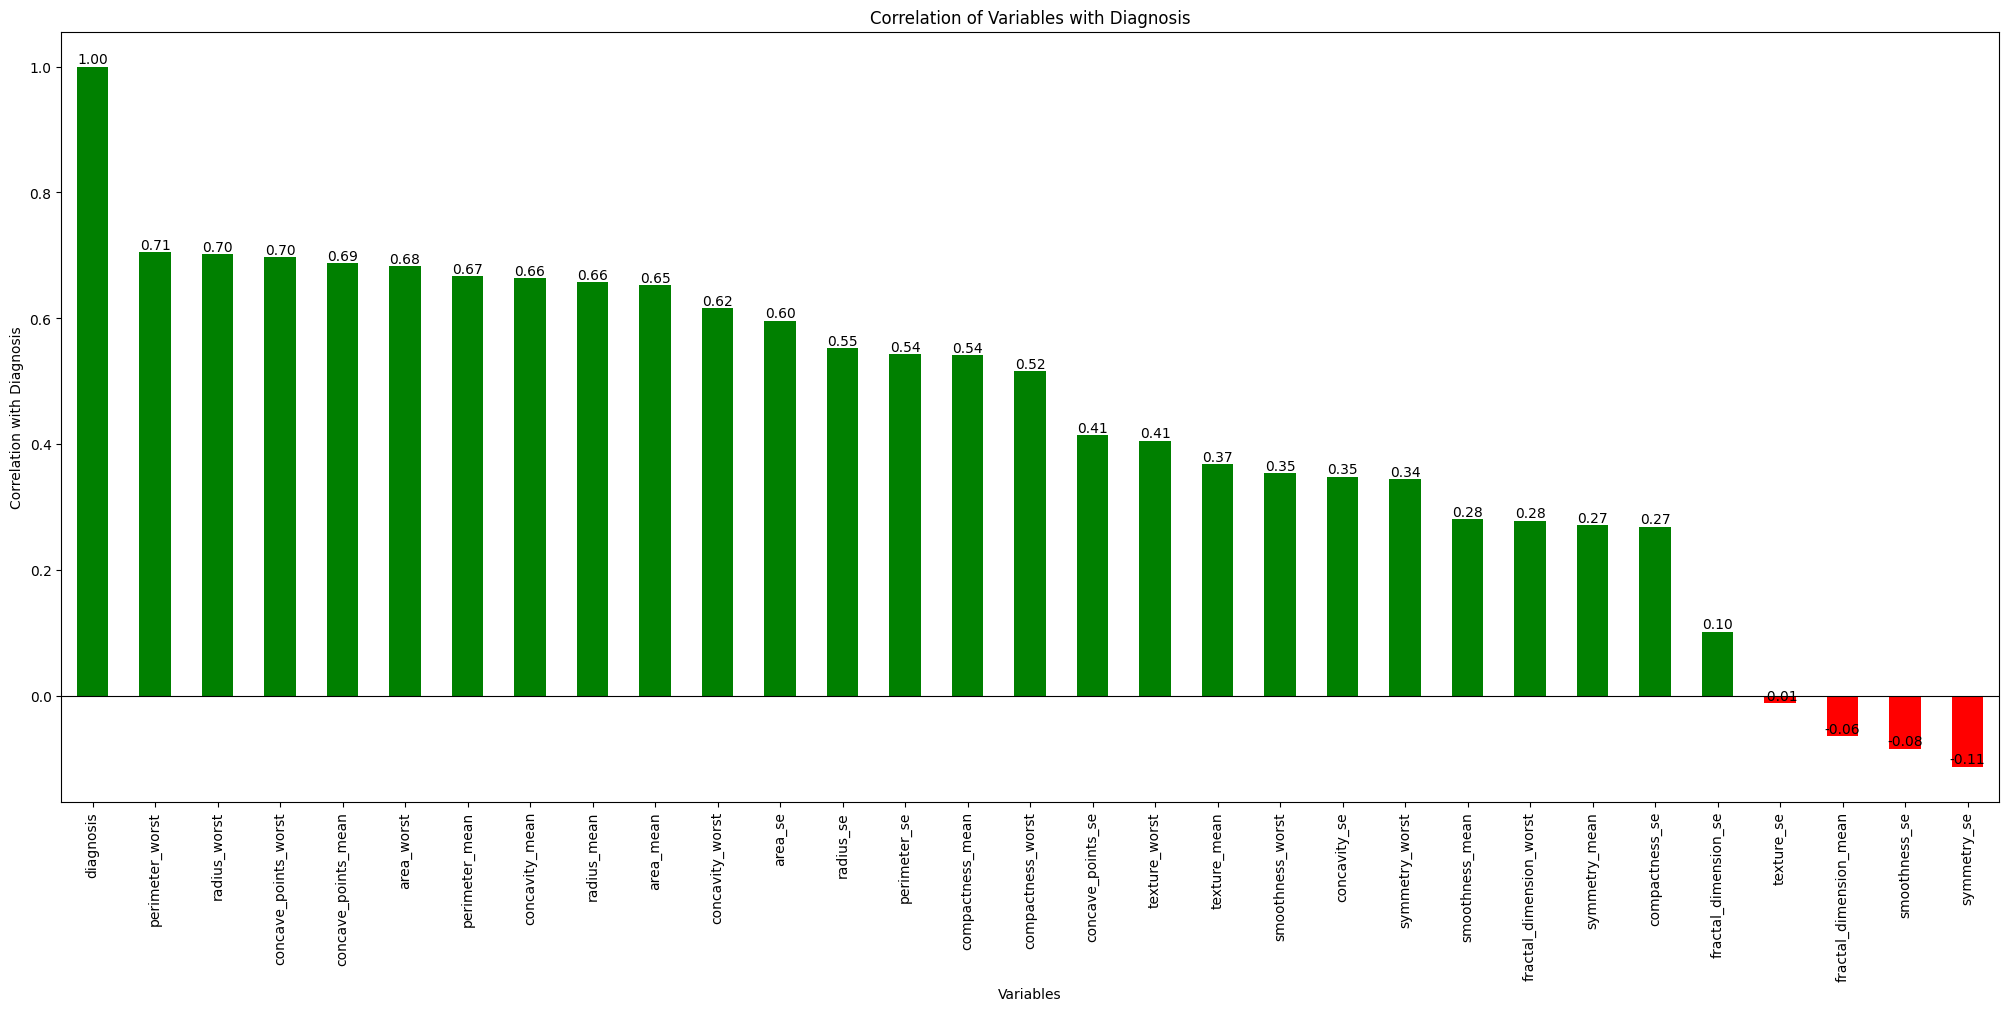

In [49]:
# Calculate the correlation between each pair of columns with the target variable

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
corr_matrix = df.corr()

diagnosis_corr = corr_matrix['diagnosis'].sort_values(ascending=False)

plt.figure(figsize=(25, 10))
colors = ['green' if x >= 0 else 'red' for x in diagnosis_corr.values]
bars = diagnosis_corr.plot(kind='bar', color=colors)

plt.title('Correlation of Variables with Diagnosis')
plt.xlabel('Variables')
plt.ylabel('Correlation with Diagnosis')
plt.axhline(0, color='black', linewidth=0.8)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', color='black')

plt.show()

df['diagnosis'] = df['diagnosis'].map({0: 'B', 1: 'M'})

### 2.4. Backward Elimination

Before adopting Backward Elimination for feature selection, we evaluated several well-known algorithms, including:

- Forward Selection: Starts with no variables in the model, adding them one by one, based on which have the strongest statistical support.
- Recursive Feature Elimination (RFE): Iteratively constructs a model and removes the weakest feature (or features) until the desired number of features is achieved.
- Principal Component Analysis (PCA): A dimensionality reduction technique that transforms the original variables into a new set of variables (principal components), which are linear combinations of the original variables

However, Backward Elimination was chosen due to its simplicity and effectiveness. 

This method starts with all variables and progressively removes the least significant ones, enhancing model accuracy by reducing overfitting ( model learns the detail and noise in the training data to an extent that it negatively impacts the performance of the model on new data) and simplifying the model.

This approach not only refines the model's performance but also makes it more practical for real-world applications like medical diagnostics by focusing only on essential data, thus streamlining the data collection process.

In [50]:
df = pandas.read_csv("../data/data_clean.csv", index_col=None)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Separating the independent variables (X) and the dependent variable (y)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
p_value_threshold = 0.05

while len(X.columns) > 0:
    model = sm.Logit(y, X).fit(disp=0)
    p_values = model.pvalues
    max_p_value = p_values.max() 
    feature_with_max_p_value = p_values.idxmax()
    if max_p_value > p_value_threshold:
        X.drop(feature_with_max_p_value, axis=1, inplace=True)
    else:
        break

significant_features = X.columns.drop('const')
significant_features_list = significant_features.tolist()

print('Significant features after backward elimination:')
print(significant_features_list)

Optimization terminated successfully.
         Current function value: 0.143206
         Iterations 20
Significant features after backward elimination:
['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'texture_se', 'area_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'compactness_worst', 'fractal_dimension_worst']


The backward elimination process has successfully identified 14 significant features that are potentially predictive of the diagnosis, which is coded as 0 for benign and 1 for malignant cases, leaving our dataset with the following look:

In [51]:
# Keep only the significant features
df = pandas.read_csv("../data/data_clean.csv", index_col=None)
df = df[['diagnosis'] + significant_features_list]

df.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,radius_se,texture_se,area_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,compactness_worst,fractal_dimension_worst
0,M,13.37,86.24,551.1,0.09263,0.06154,0.3242,1.1080,24.53,0.003187,14.97,25.41,686.5,0.2119,0.08004
1,M,20.57,132.90,1326.0,0.07864,0.08690,0.5435,0.7339,74.08,0.003532,24.99,23.41,1956.0,0.1866,0.08902
2,M,19.69,130.00,1203.0,0.15990,0.19740,0.7456,0.7869,94.03,0.004571,23.57,25.53,1709.0,0.4245,0.08758
3,M,13.37,86.24,551.1,0.09263,0.06154,0.3242,1.1080,24.53,0.003187,14.97,25.41,686.5,0.2119,0.08004
4,M,20.29,135.10,1297.0,0.13280,0.19800,0.7572,0.7813,94.44,0.005115,22.54,16.67,1575.0,0.2050,0.07678


## 3. Modeling

With the dataset analyzed and cleaned, we now transition to the core of our project: modeling. In this phase, we aim to build predictive models that will allow us to test hypotheses and make predictions based on our data. 

This section outlines our approach to selecting, training, and evaluating different machine learning models. We will explore three distinct models to determine which best meets our project objectives.

### 3.1. Unbalanced Data

Since the dataset is quite unbalanced (357 benign and 212 malignant) and because models trained on unbalanced data tend to be biased towards the majority class, often at the expense of prediction accuracy for the minority class, we will explore three different feature sampling methods:

- **Oversampling the Minority Class**: This method involves replicating instances of the minority class to balance the class distribution. 
- **Undersampling the Majority Class**: This technique reduces the number of instances from the majority class to match the minority class size.
- **Synthetic Sample Generation (SMOTE)**: The Synthetic Minority Over-sampling Technique (SMOTE) generates synthetic samples from the minority class.

In [52]:
data = pandas.read_csv('../data/data_clean.csv')
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

print("Original class distribution:", Counter(y))

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)
X_rus, y_rus = rus.fit_resample(X, y)
X_smote, y_smote = smote.fit_resample(X, y)

print("Oversampled class distribution:", Counter(y_ros))
print("Undersampled class distribution:", Counter(y_rus))
print("SMOTE class distribution:", Counter(y_smote))

Original class distribution: Counter({'B': 357, 'M': 212})
Oversampled class distribution: Counter({'M': 357, 'B': 357})
Undersampled class distribution: Counter({'B': 212, 'M': 212})
SMOTE class distribution: Counter({'M': 357, 'B': 357})


Oversampling is good for small datasets because it keeps all the information, but it can cause overfitting. Overfitting happens when a model learns the training data so well, including its errors and unimportant details, that it performs poorly on new data. On the other hand, undersampling works well for very large datasets because it makes the model run faster, but it means losing some data.

Given that our dataset quite small and we want to keep as much information as possible without losing diversity, SMOTE (Synthetic Minority Over-sampling Technique) is the best choice. SMOTE creates new examples from the minority class, helping avoid overfitting and making our model predict better on new data.

So, we'll use SMOTE to prepare our data for building the model.

In [53]:
def applySampling(all_inputs, all_labels, test_size):
    smote = SMOTE(random_state=0)
    X_resampled, y_resampled = smote.fit_resample(all_inputs, all_labels)
    return train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=0)        

### 3.2. Building the Models

In this phase, we're going to test different classification models to find out which one works best. 

To make sure our results are reliable and not just lucky guesses, we will use cross-validation. This technique checks the model's performance using different data subsets for training and testing. We will also fine-tune each model's parameters to make them as effective as possible. We're focusing only on results from the best parameters to keep our evaluation clear and useful.

We'll use several key metrics to check each model's accuracy and reliability:

- **Accuracy**: This tells us how well the model works by showing the percentage of correct predictions from all predictions made.
- **Precision**: This is important when making a wrong positive prediction is costly. It shows how accurate the positive predictions are.
- **Recall**: Also called sensitivity, this measures if the model can find all the relevant cases. It's important when missing a positive case can have serious consequences.
- **F1 Score**: This is the average of precision and recall. It helps balance the two, especially when the classes are uneven and focusing on one metric might be misleading.

We will also look at the confusion matrix for each model. This chart shows the true positives, true negatives, false positives, and false negatives, helping us understand each model better.

In [54]:
from sklearn.metrics import fbeta_score

def applyMetrics(model, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test, dtc = False):
    
    accuracy = accuracy_score(testing_classes, testing_predictions)
    precision = precision_score(testing_classes, testing_predictions, pos_label = 1)
    recall = recall_score(testing_classes, testing_predictions, pos_label = 1)
    f1 = f1_score(testing_classes, testing_predictions, pos_label = 1)

    fbeta = fbeta_score(testing_classes, testing_predictions, beta = 4, pos_label = 1)

    print("Accuracy: ", round(accuracy * 100, 3), "%")
    print("Precision: ", round(precision * 100, 3), "%")
    print("Recall: ", round(recall * 100, 3), "%")
    print("F1: ", round(f1 * 100, 3), "%")
    if(dtc ==  True):
        print("FBeta with Beta = 4 : ", round(fbeta * 100, 3), "%")
    print("Training time: ", round(end_train - start_train, 3), "s")
    print("Testing time: ", round(end_test - start_test, 3), "s")
    
    # Generate and display the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    ConfusionMatrixDisplay.from_estimator(model, testing_inputs, testing_classes,
                                          display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues, ax=ax)
    ax.set_title('Confusion Matrix of the Classifier')
    plt.show()

### 3.3. Model Selection

In [55]:
# Prepare data
all_inputs = df.drop(['diagnosis'], axis=1).values
all_labels = df['diagnosis'].values

# Encode the target variable to numerical format
all_labels = LabelEncoder().fit_transform(all_labels)

# Standardize the inputs to have a mean of 0 and a standard deviation of 1
def standardize(inputs): 
    return StandardScaler().fit_transform(inputs)

We will evaluate the following three models:

#### 3.3.1. Decision Trees

Decision Trees are a straightforward method used for classification and regression tasks. They split a dataset into smaller subsets using simple decision rules inferred from the data features, creating a tree-like model of decisions. This model is easy to understand and visualize. The depth of the tree is crucial and impacts the model's accuracy and complexity. Decision Trees are best for data where relationships between features are clear.
The backwards elimination is not necessary for the decision trees since they already make the feature selection.

In [56]:
df_dc = pandas.read_csv("../data/data_clean.csv", index_col=None)

# Prepare data
all_inputs_dc = df_dc.drop(['diagnosis'], axis=1).values
all_labels_dc = df_dc['diagnosis'].values

# Encode the target variable to numerical format
all_labels_dc = LabelEncoder().fit_transform(all_labels_dc)


##### 3.3.1.1. Parameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score, recall_score

dtc = DecisionTreeClassifier()

def custom_fbeta_score(y_true, y_pred, Beta):
    return fbeta_score(y_true, y_pred, beta=Beta, pos_label=1)

best = False
if (best):
    parameter_grid = {'max_depth': [10],
                    'max_features': [30],
                    'criterion': ['entropy'],
                    'ccp_alpha' : [0.010],
                    }
else:
    parameter_grid = {'max_depth': [5,10, 15, 20, 25, 30],
                    'max_features': [15, 20, 25, 30],
                    'criterion': ['gini', 'entropy', 'log_loss'],
                    'ccp_alpha' : [0.0,0.010,0.02,0.030,0.040],
                    'class_weight' : [{0 : 1, 1 : 4}, {0 : 1 , 1 : 2}, {0 : 1 , 1 : 3}]
                    }
    
custom_fbeta_scorer = make_scorer(custom_fbeta_score, Beta=4)

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
    all_inputs_dc, all_labels_dc, 0.25)


training_inputs = standardize(training_inputs)
testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=cross_validation, scoring=custom_fbeta_scorer)
grid_search.fit(training_inputs, training_classes)

best_params = grid_search.best_params_
dtc.set_params(**best_params)

print('Best parameters: ', grid_search.best_params_)

print('Best score: {}'.format(grid_search.best_score_))

print(dtc.get_params())

Best parameters:  {'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 15}
Best score: 0.9745915182642013
{'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 15, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


{'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 15}


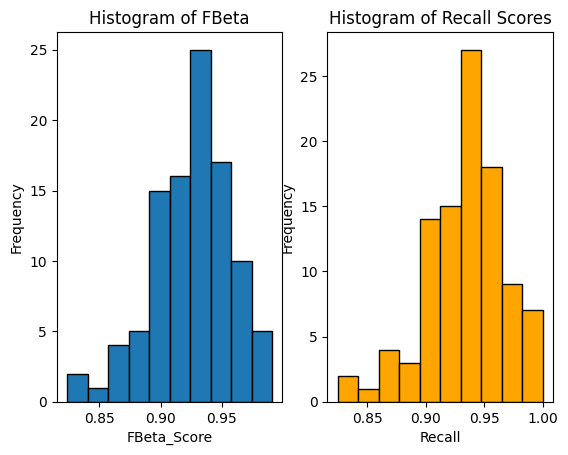

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

print(best_params)

model_f1 = []
model_recall =  []

for repetition in range(100):
    X_train, X_test, y_train, y_test = train_test_split(all_inputs_dc, all_labels_dc, test_size=0.25)
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.set_params(**best_params)
    decision_tree_classifier.fit(X_train, y_train)
    predictions = decision_tree_classifier.predict(X_test)
    fbeta = fbeta_score(y_test, predictions, pos_label= 1 , beta = 4)
    recall = recall_score(y_test, predictions, pos_label= 1 )
    model_f1.append(fbeta)
    model_recall.append(recall)


plt.subplot(1, 2, 1)
plt.hist(model_f1, bins=10, edgecolor='black')
plt.title('Histogram of FBeta')
plt.xlabel('FBeta_Score')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(model_recall, bins=10, edgecolor='black', color = 'orange')
plt.title('Histogram of Recall Scores')
plt.xlabel('Recall')
plt.ylabel('Frequency')
plt.show()

The results are compiled into lists called `model_f1` and `model_recall`. The distribution of these scores across 100 iterations is depicted by histograms:

- The F-beta score distribution is shown in the left histogram. The majority of scores fall between 0.9 and 0.95, suggesting that the model has a generally high recall due to weights and a good capacity to properly detect malignant instances ('M').
- The recall scores, which are primarily near to 1, are displayed on the right histogram and likewise seem to be high. This implies that the majority of malignant cases are probably appropriately identified by the model, which has a high true positive rate. In medical diagnostics, recall is a crucial parameter that assesses the model's capacity to recognize all positive cases, or in this example, all malignant tumors.

High scores in both histograms suggest that the decision tree model works well at discriminating across classes, especially in correctly detecting the more serious malignant instances, given the parameters it is provided and with an emphasis on recall. But given the high beta value and lack of accuracy, care is suggested about the possible trade-off that might result from a rise in false positives (benign cases misdiagnosed as malignant).

With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we,ve mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  88.268 %
Precision:  81.25 %
Recall:  96.296 %
F1:  88.136 %
FBeta with Beta = 4 :  95.259 %
Training time:  0.009 s
Testing time:  0.0 s


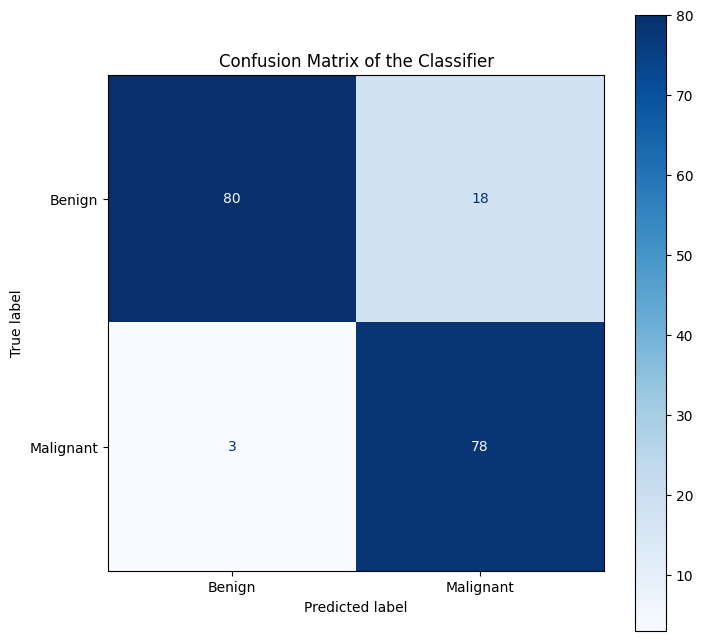

In [59]:
# Train the model
start_train = time.time()
dtc.fit(training_inputs, training_classes)
end_train = time.time() 
 
# Test the model
start_test = time.time()
testing_predictions = dtc.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(dtc, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test, dtc=True)

The Confusion Matrix Analysis shows how well the classifier performed in predicting the true labels ('B' for benign and 'M' for malignant) in comparison to the predicted labels.
1. Confusion Matrix Analysis:
- Of the 81  instances classified as benign, 79 are genuine negatives.
- of the 98 instances classified as malign, 79 are true positives.
- There are 2 false negative, meaning that two cancer case was misdiagnosed as benign.
- 19 instances were misclassified as cancer while being benign, resulting in nine false positives.

2. Performance Insights:
- The high proportion of real positives and negatives indicates a high degree of accuracy for the classifier.
- In a medical setting, it is especially beneficial if there be few false negatives as it implies the classifier is less likely to overlook a potentially fatal cancer case.
Positively, the number of false positives is still quite low when compared to the true classifications, even though it is higher than the number of erroneous negatives.

3. Clinical Implications:
- For patients with malignant illnesses to get prompt and appropriate medical treatment, it is essential to be able to accurately detect malignant instances (true positives) while avoiding false negatives.
- Even if a small number of benign cases were mistakenly reported as malignant (false positives), this is sometimes regarded as more acceptable than neglecting malignant instances because it can result in more testing rather than postponing treatment.

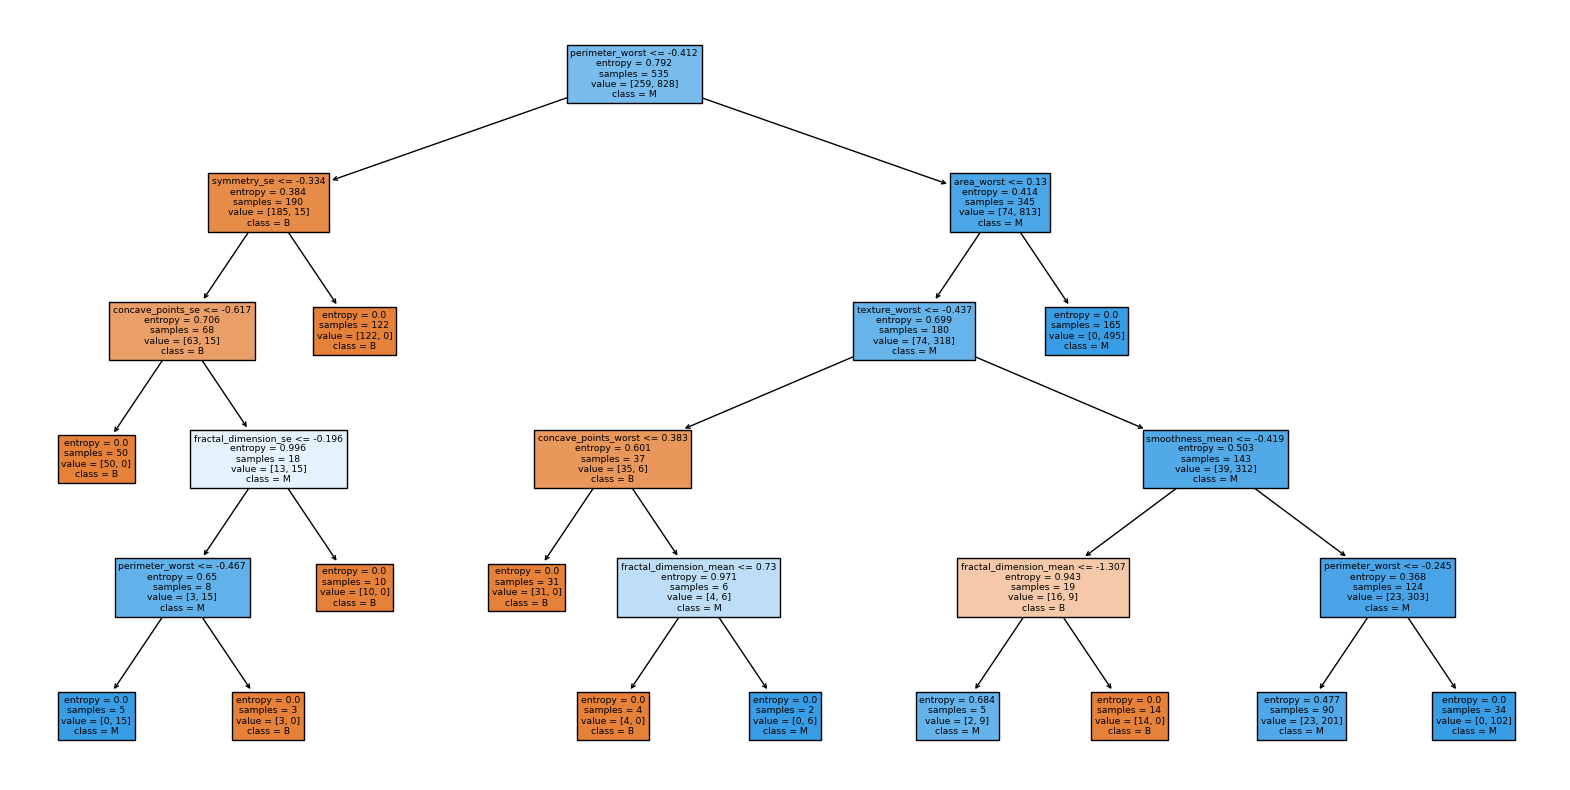

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=df_dc.drop(['diagnosis'], axis=1).columns, class_names=['B', 'M'])
plt.show()

Here we can see the decision tree model used for classification with `B` corresponding to the `benign cases` and with `M` corresponding to the `malignant cases`.

1) `Root Node`: perimeter_worst <= -0.412 is the choice criterion used by the top node (root). It is the beginning point of categorization, with an entropy of 0.702, and the data set consists of 535 samples. 276(1104/4) of them have been classified as class 1 (malignant), and 259 as class 0 (benign). A greater entropy number shows that the data at this level are more mixed (less pure), and the entropy value here indicates some degree of chaos.

2) `First Split` :
- A further split based on perimeter_worst <= -0.412 suggests that this characteristic also plays a significant role in categorizing the samples at this level. The left branch of the root node indicates that the samples are categorized as class 0 when perimeter_worst is less than or equal to -0.412.
- When len_concave_points_mean is applied as the decision criterion, the samples are split into two groups again.

3) `Leaf Nodes` :
- Every leaf, or end node, reflects a low-entropy decision result (preferably near zero), indicating a pure subset. There are nodes in the shown tree that have an entropy of 0, indicating flawless classification inside those nodes—all samples belong to the same class.
- As an illustration, one leaf node on the left displays 126 samples that are all in B, demonstrating a perfect classification, and another leaf node on the right displays 163 samples that are all in M.

4) `Further Splits and Depth` :
- Further splits are produced depending on several attributes as the tree branches out, each of which aims to best divide the samples into subsets for more precise classifications.
- The tree as a whole clearly uses entropy as the split criterion, with each node trying to lower entropy and raise the subsets' purity in the process.

5) `Overall Insights`:
- The ccp_alpha option (0.01) suggests that the decision tree has been trimmed in order to prevent overfitting.
- A focus to accurately distinguish potentially more critical situations due to their gravity in medical prognosis is reflected in the adjustment of the class_weight parameter to give more weight to the malignant cases (M).


#### 3.3.2. Neural Networks

Neural Networks are advanced models designed to recognize patterns in complex data. Mimicking the human brain, they consist of layers of neurons that process inputs and adjust inter-neural connections to improve predictions. The depth and width of these layers are key to their performance. Neural Networks excel in tasks like image and speech recognition, handling data with intricate relationships effectively.

##### 3.3.2.1. Parameter Tuning

In [61]:
# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

clf = MLPClassifier()

best = True
if (best):
    parameter_grid = {}
else:
    parameter_grid = {
        'activation': ['tanh', 'relu'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [100, 200, 300],
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'early_stopping': [True, False]
    }

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
    all_inputs, all_labels, 0.25)

training_inputs = standardize(training_inputs)
testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(clf, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(training_inputs, training_classes)

print('Best parameters: ', grid_search.best_params_)

Best parameters:  {}


With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we've mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  93.296 %
Precision:  87.912 %
Recall:  98.765 %
F1:  93.023 %
Training time:  3.755 s
Testing time:  0.005 s


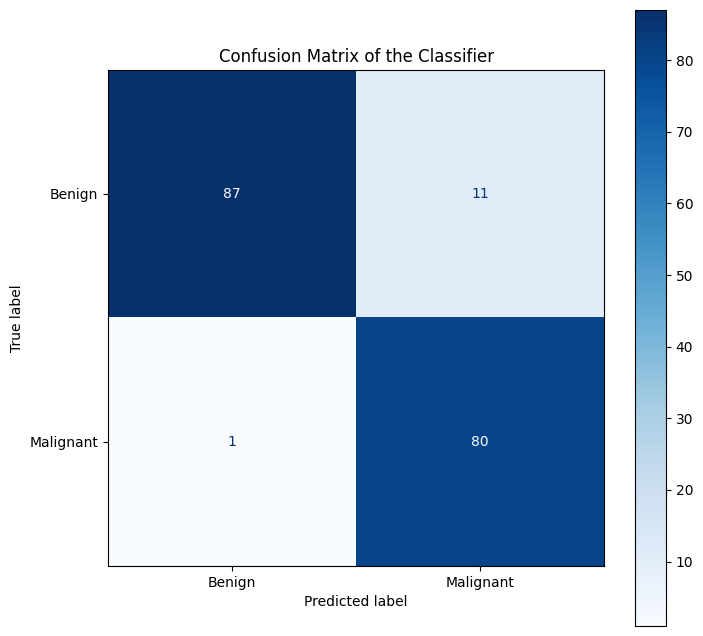

In [62]:
# Train the model
start_train = time.time()
clf.fit(training_inputs, training_classes)
end_train = time.time()

# Test the model
start_test = time.time()
testing_predictions = clf.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(clf, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test)

Conclusão

#### 3.3.3. K-Nearest Neighbours

The K-Nearest Neighbors (KNN) model is a straightforward and widely used classification technique. It works by finding the closest data points in the training set to a new point and predicting its class based on the majority class of these neighboring points. The number of neighbors, or 'k', is a key parameter that determines how many nearby points to consider. KNN is particularly effective for simple datasets where the relationship between features is not overly complex.

##### 3.3.3.1. Parameter Tuning

In [63]:
knn = KNeighborsClassifier()

best = True
if (best):
    parameter_grid = {
                'leaf_size': [10], 
                'metric': ['manhattan'],
                'n_neighbors': [9], 
                'algorithm': ['kd_tree'],
                'p': [1],
                'weights': ['distance']
                }
else:
    parameter_grid = {'leaf_size': [10, 20, 30, 40, 50], 
                    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'p': [1, 2],
                    'weights': ['uniform','distance']
                    }

# Using SMOTE to balance the dataset and split it into training and testing sets
(training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
    all_inputs, all_labels, 0.25)

# training_inputs = standardize(training_inputs)
# testing_inputs = standardize(testing_inputs)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(knn, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(training_inputs, training_classes)

print("Best parameters: ", grid_search.best_params_)

knn = grid_search.best_estimator_

Best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


With the best parameters found, we'll train our model and evaluate its performance using metrics like accuracy, precision, recall, and the F1 score.

Like we've mentioned before, we'll also display the confusion matrix to visually assess how well the model distinguishes between classes, ensuring our predictions are accurate and dependable.

Accuracy:  92.737 %
Precision:  86.957 %
Recall:  98.765 %
F1:  92.486 %
Training time:  0.003 s
Testing time:  0.003 s


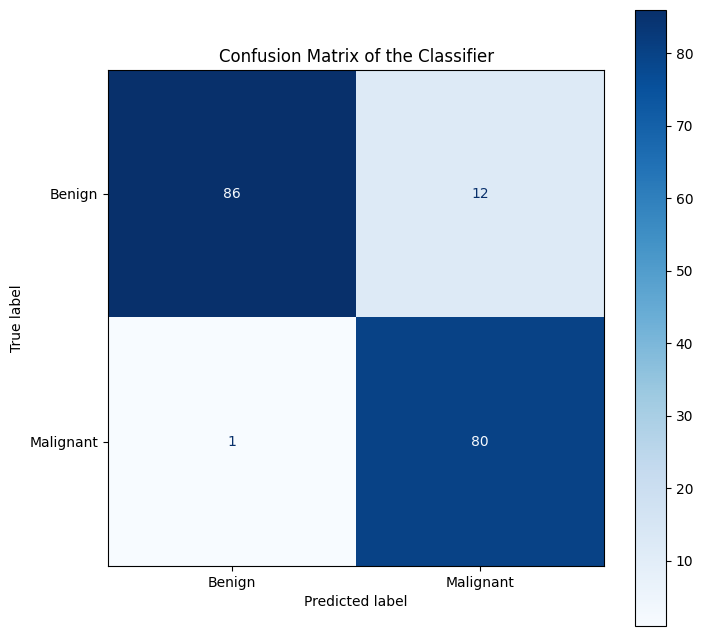

In [64]:
# Train the model
start_train = time.time()
knn.fit(training_inputs, training_classes)
end_train = time.time()

# Test the model
start_test = time.time()
testing_predictions = knn.predict(testing_inputs)
end_test = time.time()

# Model evaluation
applyMetrics(knn, testing_predictions, testing_inputs, testing_classes, start_train, end_train, start_test, end_test)

The K-Nearest Neighbors (KNN) model performed well, reaching an accuracy above 90% with similar scores for precision, recall, and F1. These results confirm the model's ability to effectively distinguish between benign and malignant classes. Using SMOTE to balance the dataset and careful tuning of parameters helped achieve these results.

The model was also very fast in training and testing, each taking about 0.0 seconds, showing that it can make quick predictions. This makes it a good choice for situations where fast decision-making is important.

Interestingly, normalizing the data did not improve results; it made them slightly worse. This suggests that for this data and model setup, the original scale of the features was already suitable. Changes in the test size didn’t significantly affect accuracy, indicating that the model is stable across different data splits.

Additionally, adjustments in the number of folds in cross-validation, did not notably alter the outcomes, highlighting the model's stability and reliability.

In summary, the KNN model is reliable and fast, making it useful for quick and accurate medical diagnoses.

## 4. Evaluation

Comparar todos os algoritmos pelas suas métricas